In [1]:

import gmm_lib
import numpy as np
import matplotlib.pyplot as plt
import pyprobml_utils as pml
from matplotlib.colors import ListedColormap
import requests
from io import BytesIO

url = 'https://raw.githubusercontent.com/probml/probml-data/main/data/faithful.txt'
response = requests.get(url)
rawdata = BytesIO(response.content)



def create_colormap():
    N = 256
    vals = np.ones((N, 4))
    vals[:, 0] = np.linspace(31/256, 214/256, N)
    vals[:, 1] = np.linspace(119/256, 39/256, N)
    vals[:, 2] = np.linspace(180/256, 40/256, N)
    cmap = ListedColormap(vals)
    return cmap



saving image to d:\WP\Zpace\Workspace\Teaching\IE4497\Repository\Lectures\Weeks 1-6\pml-code\notebooks\..\figures\gmm_faithful.pdf


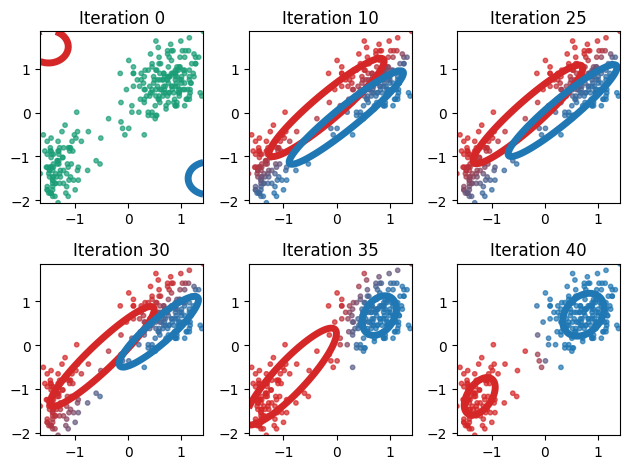

In [2]:

def main():
    cmap = create_colormap()
    X = np.loadtxt(rawdata)
    # Normalise data
    X = (X - X.mean(axis=0)) / (X.std(axis=0))
    mu1 = np.array([-1.5, 1.5])
    mu2 = np.array([1.5, -1.5])

    # Initial configuration
    Sigma1 = np.identity(2) * 0.1
    Sigma2 = np.identity(2) * 0.1
    pi = [0.5, 0.5]
    mu = [mu1, mu2]
    Sigma = [Sigma1, Sigma2]

    res = gmm_lib.apply_em(X, pi, mu, Sigma)

    # Create grid-plot
    hist_index = [0, 10, 25, 30, 35, 40]
    fig, ax = plt.subplots(2, 3)
    ax = ax.ravel()
    for ix, axi in zip(hist_index, ax):
        pi, mu, Sigma = res["coeffs"][ix]
        r = res["rvals"][ix]
        if ix == 0:
            r = np.ones_like(r)

        colors = cmap if ix > 0 else "Dark2"
        gmm_lib.plot_mixtures(X, mu, pi, Sigma, r, cmap=colors, ax=axi)
        axi.set_title("Iteration {ix}".format(ix=ix))
        
    plt.tight_layout()
    pml.savefig('gmm_faithful.pdf', dpi=300)
    plt.show()


if __name__ == "__main__":
    main()

